In [1]:
import math

def distance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 3963  # radius of Earth (miles)
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R

cities = {
        'New York City': (40.72, 74.00),
        'Los Angeles': (34.05, 118.25),
        'Chicago': (41.88, 87.63),
        'Houston': (29.77, 95.38),
        'Phoenix': (33.45, 112.07),
        'Philadelphia': (39.95, 75.17),
        'San Antonio': (29.53, 98.47),
        'Dallas': (32.78, 96.80),
        'San Diego': (32.78, 117.15),
        'San Jose': (37.30, 121.87),
        'Detroit': (42.33, 83.05),
        'San Francisco': (37.78, 122.42),
        'Jacksonville': (30.32, 81.70),
        'Indianapolis': (39.78, 86.15),
        'Austin': (30.27, 97.77),
        'Columbus': (39.98, 82.98),
        'Fort Worth': (32.75, 97.33),
        'Charlotte': (35.23, 80.85),
        'Memphis': (35.12, 89.97),
        'Baltimore': (39.28, 76.62)
    }

# create a distance matrix
distance_matrix = {}
for ka, va in cities.items():
    distance_matrix[ka] = {}
    for kb, vb in cities.items():
        if kb == ka:
            distance_matrix[ka][kb] = 0.0
        else:
            distance_matrix[ka][kb] = distance(va, vb)

In [17]:
import metapy as mp
from metapy.algorithms import SimulatedAnnealing
from random import shuffle


class AnnealingTSP(SimulatedAnnealing):
    def __init__(self, distance_matrix, state=None, init_temperature=None, minimize=True):
        self.distance_matrix = distance_matrix
        return super().__init__(state=state, init_temperature=init_temperature, minimize=minimize)
    
    def energy(self, state):
        now = state[0]
        distance = 0.0
        route = (point for point in state[1:])
        while True:
            try:
                next_stop = next(route)
                distance += self.distance_matrix[now][next_stop]
                now = next_stop
            except StopIteration:
                break
        return distance
    
    def alter(self, state):
        return mp.mutation.swap_mutation(state)

state = [i for i in list(cities.keys())]
shuffle(state)
tsp = AnnealingTSP(distance_matrix, state)
res = tsp.optimize(max_iterations=1000)

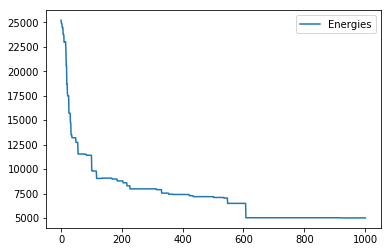

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(np.arange(len(res.best_progress)), res.best_progress, label="Energies")
plt.legend()
plt.show()

In [19]:
print(res.function_calls)

{'energy': 1002, 'alter': 1001, 'state changes': 99}
